# Mental Health in Tech Survey

## Objectives

Mental illness, also called mental health disorders, refers to a wide range of mental health conditions — disorders that affect your mood, thinking and behavior. Examples of mental illness include depression, anxiety disorders, schizophrenia, eating disorders and addictive behaviors.

People may have mental health conditions time to time. However, a mental health concern becomes a mental illness when ongoing signs and symptoms cause frequent stress and affect your ability to function.

With the Covid-19 situation and remote-work setting, mental health issues become more critical among people who work in the Tech. Better mental health can increase the overall productivity of employees and make them live a happier life. Therefore, this project tries to explore the behivor of different groups and find solutions to improve their mental health condition.

## Questions

1. How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?
2. What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?




## Data specification
It contains the following columns and survey questions:

0. **Timestamp**
1. **Age**
2. **Gender**
3. **Country**
4. **state**: If you live in the United States, which state or territory do you live in?
5. **self_employed**: Are you self-employed?
6. **family_history**: Do you have a family history of mental illness?
7. **treatment**: Have you sought treatment for a mental health condition?
8. **work_interfere**: If you have a mental health condition, do you feel that it interferes with your work?
9. **no_employees**: How many employees does your company or organization have?
10. **remote_work**: Do you work remotely (outside of an office) at least 50% of the time?
11. **tech_company**: Is your employer primarily a tech company/organization?
12. **benefits**: Does your employer provide mental health benefits?
13. **care_options**: Do you know the options for mental health care your employer provides?
14. **wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?
15. **seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?
16. **anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
17. **leave**: How easy is it for you to take medical leave for a mental health condition?
18. **mentalhealthconsequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?
19. **physhealthconsequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?
20. **coworkers**: Would you be willing to discuss a mental health issue with your coworkers?
21. **supervisor**: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
22. **mentalhealthinterview**: Would you bring up a mental health issue with a potential employer in an interview?
23. **physhealthinterview**: Would you bring up a physical health issue with a potential employer in an interview?
24. **mentalvsphysical**: Do you feel that your employer takes mental health as seriously as physical health?
25. **obs_consequence**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
26. **comments**: Any additional notes or comments

## Content
1. Dependent Library loading
2. Data Loading and Wrangling
  - 2.1 Data loading and exploring
  - 2.2 Data wrangling
  - 2.3 Feature Engineering
  - 2.4 Exploratory Data Analysis after encoding
3. Clustering
  - 3.1 K-means
  - 3.2 PCA
  - 3.3 Cluster interpretation
  - 3.4 K-means with one-hot encoding
4. Conclusion & Recommendation
  - 4.1 Summary
  - 4.2 Future work
  - 4.3 Scale up

## 1. Dependent Library loading

**Yellowbrick**, **tqdm**, and **kneed** libraries are used for this analysis. If they are not installed, you may need to use the following code to install them.

    `pip install yellowbrick`
    
    `pip install tqdm`
    
    `pip install kneed`

In [ ]:
# load data process and visualization library
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing and clustering library
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans #, MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# load clustering visualization library
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kneed import KneeLocator
from tqdm import tqdm

# load system library
import sys
import warnings
warnings.filterwarnings("ignore")

# set parameters
RNDN = 42     # set the random state
nK = 12     # set maximum number of cluster

%matplotlib inline
pd.set_option("display.precision",2)
np.set_printoptions(precision=3, suppress=True)
pd.options.display.float_format = '{:.3f}'.format

## 2. Data Loading and Wrangling

## 2.1 Data loading and exploring

In [ ]:
# read the input csv files
df = pd.read_csv('survey.csv')

In [ ]:
# check the shape of dataframe
df.shape

(1259, 27)

In [ ]:
# check the first few rows
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
# check dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
# check the distribution of data frame
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1259,1246,2014-08-27 15:23:51,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1259.000,NaN,NaN,NaN,79428148.311,2818299442.982,-1726.000,27.000,31.000,36.000,99999999999.000
Gender,1259,49,Male,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,1259,48,United States,751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,744,45,CA,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
self_employed,1241,2,No,1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family_history,1259,2,No,767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
treatment,1259,2,Yes,637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_interfere,995,4,Sometimes,465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_employees,1259,6,6-25,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### observation of data points
- **Age**: There are negative and extremely high age values, which could be wrong records.
- **Gender**: 49 labels of gender appear in the dataset, which means there could be different spellings.
- **Country**: There are 48 countries in the dataset. However, 751 of them are from the United States, which means it may not be good features.

## 2.2 Data wrangling

In [ ]:
# Because timestamp is not needed for this analysis, it will be removed.
df= df.drop(['Timestamp'], axis= 1)

### 2.2.1 Age

1. Explore the outlier of age and remove the outlier if needed
2. Vsualize the trend

Text(0.5, 1.0, 'The boxplot of age')

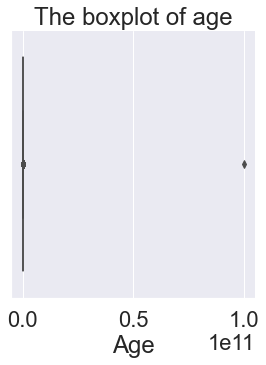

In [ ]:
# histogram of Age
sns.set_style('darkgrid')
sns.set(font_scale = 2)
g = sns.FacetGrid(df, size=5)
g = sns.boxplot(x=df["Age"])
plt.title('The boxplot of age')
# plt.savefig('age.png', dpi = 80)

#### Observation
There are errors in Age

In [1]:
# Generally, people under the age of 10 may not be able to work
df.loc[df['Age'] <=10]

NameError: name 'df' is not defined

In [ ]:
# Generally, people over the age of 100 may not work
df.loc[df['Age'] >= 100]

In [ ]:
# remove the records with Age under 10 and over 100
df_1 = df.loc[df['Age']>10].loc[df['Age']< 100]

In [ ]:
# plot the age distribution for different treatment group (True/False)
sns.set_style('darkgrid')
sns.set(font_scale = 2)
g = sns.FacetGrid(df_1, col='treatment', size=5)
g = g.map(sns.distplot, "Age")

In [ ]:
# set up additional feature: age range
df_1['age_range'] = pd.cut(df_1['Age'], [0,25,35,45,65,100],
                           labels=["0-25", "26-35","36-45", "46-65", "66-100"], include_lowest=True)

In [ ]:
# plot the distribution of data within different age group for different treatment group (True/False)
sns.set_style('darkgrid')
sns.set(font_scale = 2)
sns.countplot(x='age_range', hue= 'treatment', data= df_1)
plt.show()

#### Observation
There is no clear difference between the distribution of data within different age group for different treatment group (True/False)

### 2.2.2 Gender

1. Identity the unique value and combine them into different categories (remove errors if needed)
2. Visualize the demography

In [ ]:
# list the unique value of Gender
df_1.Gender.str.lower().unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'malr', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [ ]:
# check data frame shape
df_1.shape

(1252, 27)

In [ ]:
df_2 = df_1.copy()

In [ ]:
# Makee gender groups
male_str = [ "m","male", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer",
             "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)",
             "queer", "ostensibly male, unsure what that really means"]
female_str = ["female","cis female", "f",  "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in df_2.iterrows():

    if str.lower(col.Gender) in male_str:
        df_2['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df_2['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df_2['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

In [ ]:
# check data frame shape again
df_2.shape

(1252, 27)

In [ ]:
# Check the count for different genders within the dataset after cleaning
df_2.groupby('Gender')['Gender'].count().sort_values(ascending=False)

Gender
male      987
female    247
trans      18
Name: Gender, dtype: int64

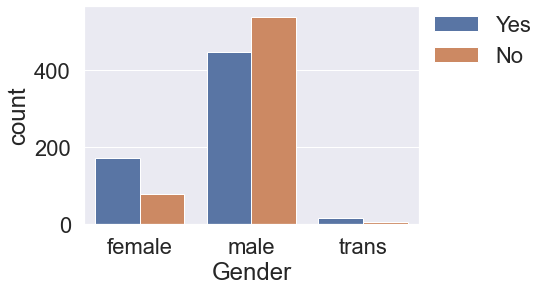

In [ ]:
# plot the distribution of data within different gender group for different treatment group (True/False)
sns.set_style('darkgrid')
sns.set(font_scale = 2)
sns.countplot(x='Gender', hue= 'treatment', data= df_2 )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

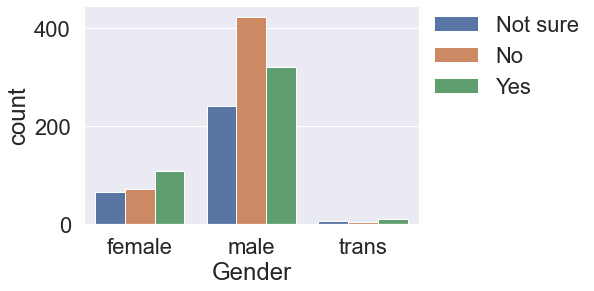

In [ ]:
# plot the distribution of data within different gender group whether they are aware of care options
sns.set_style('darkgrid')
sns.set(font_scale = 2)
sns.countplot(x='Gender', hue= 'care_options',
              data= df_2 )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Observation
Based on the survey data, there is a higher proportion of people in female group who have treatment and are aware of care options.

### 2.2.3 Country

1. Identify countries with the most respondents
2. Visualize the trend
3. We can keep this for now. It may need to be dropped after.

In [ ]:
# list the unique value of Country
df_2.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [ ]:
# list the count of country with top counts
df_country = df_2.groupby('Country')['Country'].count()
df_country = df_country[df_country >8].sort_values(ascending=False).to_frame(name = 'Count').reset_index()
df_country

,Country,Count
0,United States,747
1,United Kingdom,184
2,Canada,72
3,Germany,45
4,Ireland,27
5,Netherlands,27
6,Australia,21
7,France,13
8,India,10


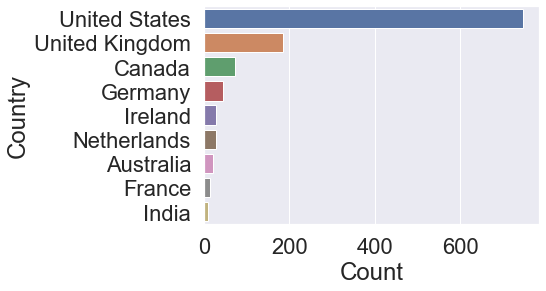

In [ ]:
# plot the count of country with top counts
sns.set_style('darkgrid')
sns.set(font_scale = 2)
ax = sns.barplot(x="Count", y="Country", data=df_country)
plt.show()

#### Observation
People in United States, United Kingdom and Canada account for most of the survey respondents. Country may not be a good feature for us to conduct clusterng

### 2.2.4 state
#### (If you live in the United States, which state or territory do you live in?)

STEPs:
1. Identify state with the most respondents
2. Visualize the trend

In [ ]:
# list the count of state with top counts
df_state = df_2.groupby('state')['state'].count()
df_state = df_state[df_state >20].sort_values(ascending=False).to_frame(name = 'Count').reset_index()
df_state

,state,Count
0,CA,138
1,WA,70
2,NY,57
3,TN,45
4,TX,44
5,OR,29
6,PA,29
7,IL,28
8,OH,28
9,IN,27


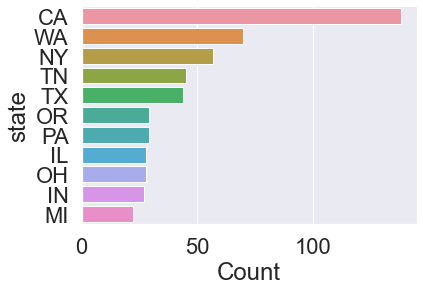

In [ ]:
# plot the count of country with top counts
sns.set_style('darkgrid')
sns.set(font_scale = 2)
ax = sns.barplot(x="Count", y="state", data=df_state)
plt.show()

#### Observation
This feature is only for respondents in United States. Due to the small sample size. This will be dropped.

In [ ]:
# drop the state column
df_3 = df_2.drop(['state'], axis= 1)

### 2.2.5 self_employed
#### (Are you self-employed?)

STEPs:
1. Identify unique repondents for self_employed and fill the hole for missing data
2. Visualize the trend

In [ ]:
# list the unique value of self_employed
df_3.self_employed.unique()

array([nan, 'Yes', 'No'], dtype=object)

In [ ]:
# check data frame shape
df_3.shape

(1252, 26)

In [ ]:
# copy old data frame
df_4 = df_3.copy()

In [ ]:
# Check the count for different employment status
df_4.groupby('self_employed')['self_employed'].count()

self_employed
No     1091
Yes     143
Name: self_employed, dtype: int64

In [ ]:
# check unique value of the no-employees column when self_employed is null
df_4[df_4.self_employed.isna()].no_employees.unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [ ]:
# The missing value for self_employed will be filled as Don't know
df_4.self_employed = df_4.self_employed.fillna('Don\'t Know')
# df_self_employed = df_4.groupby('self_employed')['self_employed'].count().to_frame(name = 'Count').reset_index()

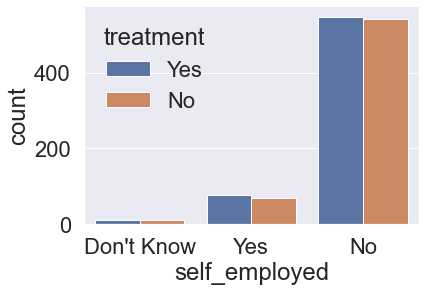

In [ ]:
# plot the distribution of data at different employment status for different treatment group (True/False)
sns.set_style('darkgrid')
sns.countplot(x='self_employed', hue= 'treatment', data= df_4 )
plt.show()

#### Observation
Based on the survey data, the status of employment (self-employed or not) doesn't have an impact on whether they have chosen mental health treatment.

### 2.2.6 family_history
#### (Do you have a family history of mental illness?)

STEPs:
1. Identify unique repondents for family_history and fill the hole for missing data
2. Visualize the trend

In [ ]:
# list the unique value of family history
df_4.family_history.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Check the count for whether the respondents have family history of mental health condition
df_4.groupby('family_history')['family_history'].count()

family_history
No     763
Yes    489
Name: family_history, dtype: int64

In [ ]:
# there is no missing value for family history column
df_4[df_4.family_history.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


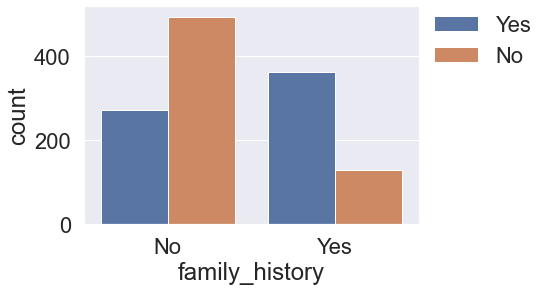

In [ ]:
# plot the distribution of data with different family history for different treatment group (True/False)
sns.set_style('darkgrid')
sns.countplot(x='family_history', hue= 'treatment', data= df_4 )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Observation
Based on the survey, if the respondents have family history of mental health condition, there is a high chance they seek for mental health treatment

### 2.2.7 **treatment**
#### (Have you sought treatment for a mental health condition?)

STEPs:
1. Identify unique repondents for treatment
2. Visualize the proportion

In [ ]:
# list the unique value of treatment
df_4.treatment.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# there is no missing value for treatment column
df_4[df_4.treatment.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


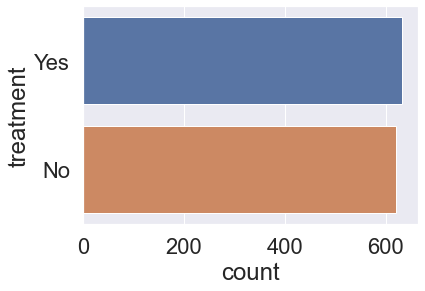

In [ ]:
# plot the count for different treatment group (True/False)
sns.set_style('darkgrid')
sns.countplot(y='treatment',  data= df_4 )
plt.show()

#### Observation
Within the dataset, the number of respondents who seek for treatment or not is almost equal.

### 2.2.8 **work_interfere**
#### (If you have a mental health condition, do you feel that it interferes with your work?)

STEPs:
1. Identify unique repondents for work_interfere
2. Visualize the proportion

In [ ]:
# list the unique value of work_interfere
df_4.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

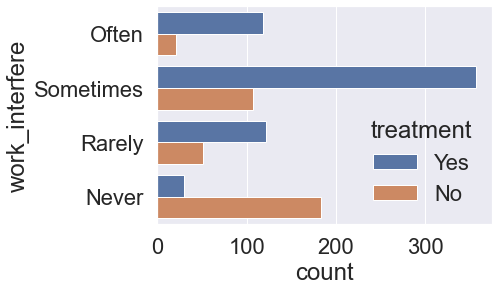

In [ ]:
# plot the distribution of data with different work-interfere frequency for different treatment group (True/False)
sns.set_style('darkgrid')
sns.countplot(y='work_interfere',  hue = 'treatment', order = ['Often', 'Sometimes', 'Rarely', 'Never'], data= df_4 )
plt.show()

In [ ]:
# Check the count for respondents with different work-interfere frequency
df_4.groupby('work_interfere')['work_interfere'].count()

work_interfere
Never        213
Often        140
Rarely       173
Sometimes    464
Name: work_interfere, dtype: int64

In [ ]:
# check the top rows with work_interfere missing
df_4[df_4.work_interfere.isna()].head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range
19,36,male,France,Yes,Yes,No,NaN,6-25,Yes,Yes,...,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,NaN,36-45
26,33,male,United States,No,No,No,NaN,1-5,No,Yes,...,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN,26-35
37,38,male,Portugal,No,No,No,NaN,100-500,No,Yes,...,Maybe,No,Some of them,Some of them,No,Maybe,No,No,NaN,36-45
38,50,male,United States,No,No,No,NaN,100-500,No,Yes,...,No,No,Some of them,Yes,No,Maybe,Don't know,No,NaN,46-65
41,35,male,United States,No,No,No,NaN,More than 1000,Yes,Yes,...,Yes,Yes,Some of them,No,No,Maybe,Don't know,No,NaN,26-35


In [ ]:
# copy the old data frame
df_5 = df_4.copy()

In [ ]:
# Because there are 262 missing values, fill na value for work interfere as Don't know
df_5.work_interfere = df_5.work_interfere.fillna('Don\'t know')

In [ ]:
# Check the count for respondents with different work-interfere frequency
df_5.groupby('work_interfere')['work_interfere'].count()

work_interfere
Don't know    262
Never         213
Often         140
Rarely        173
Sometimes     464
Name: work_interfere, dtype: int64

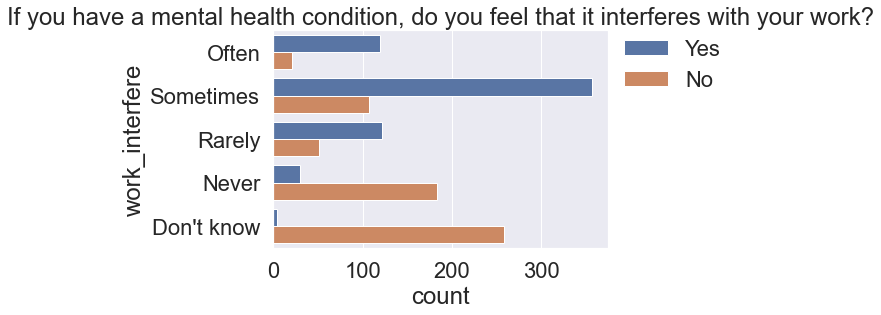

In [ ]:
# plot the distribution of data with different work-interfere frequency for different treatment group (True/False) after cleaning
sns.set_style('darkgrid')
plt.title('If you have a mental health condition, do you feel that it interferes with your work?')
sns.countplot(y='work_interfere', hue = 'treatment', order = ['Often', 'Sometimes', 'Rarely', 'Never', 'Don\'t know'],
              data= df_5 )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Observation
Based on the survey, if respondents feel they are interfered during work, they may seek mental health treatment.

### 2.2.9 no_employees
#### (How many employees does your company or organization have?)

STEPs:
1. Identify unique repondents for no_employees
2. Visualize the proportion

In [ ]:
# list the unique value of no_employees
df_5.no_employees.unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [ ]:
# check the missing value for no_employees
df_5[df_5.no_employees.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


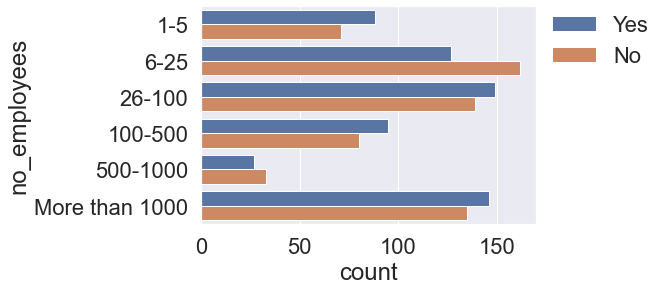

In [ ]:
# plot the distribution of data with different company size for different treatment group (True/False)
sns.set_style('darkgrid')
sns.countplot(y='no_employees', hue = 'treatment', order = ['1-5','6-25', '26-100', '100-500','500-1000', 'More than 1000'],
              data= df_5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Observation
The size of company may have a slight impact on whether employees seek for mental health treatment. However, more data point is needed to prove this

### 2.2.10 remote_work
#### (Do you work remotely (outside of an office) at least 50% of the time?)

STEPs:
1. Identify unique repondents for remote_work
2. Visualize the proportion

In [ ]:
# list the unique value of remote_work
df_5.remote_work.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# check the missing value for remote_work
df_5[df_5.remote_work.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


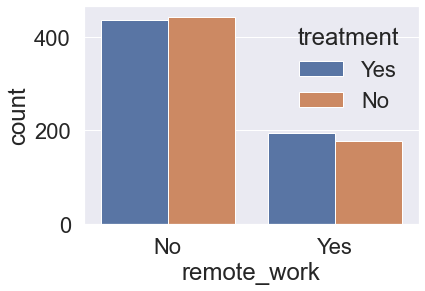

In [ ]:
# plot whether remote work impacts the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='remote_work', hue = 'treatment',  data= df_5)
plt.show()

#### Observation
Based on the survey, remote work or not may not impact whether people seek mental health treatment.

### 2.2.11 tech_company
#### (Is your employer primarily a tech company/organization?)

STEPs:
1. Identify unique repondents for tech_company
2. Visualize the proportion

In [ ]:
# list the unique value of tech_company
df_5.tech_company.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# check missing value for tech_company
df_5[df_5.tech_company.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


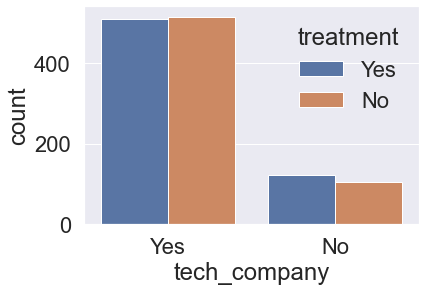

In [ ]:
# plot whether tech company impacts the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='tech_company', hue = 'treatment',  data= df_5)
plt.show()

#### Observation
Whether people work in tech or not doesn't have a huge impact on their intention for treatment.

### 2.2.12 benefits
#### (Does your employer provide mental health benefits?)

STEPs:
1. Identify unique repondents for benefits
2. Visualize the proportion

In [ ]:
# list the unique value of benefit
df_5.benefits.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [ ]:
# check missing value for benefit
df_5[df_5.benefits.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


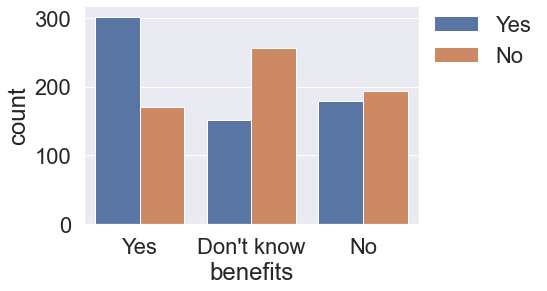

In [ ]:
# plot how benefits plan impacts the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='benefits', hue = 'treatment',  data= df_5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Observation
It will encourage employees to seek mental health treatment if their employer provide mental health benefits

### 2.2.13 care_options
#### (Do you know the options for mental health care your employer provides?)

STEPs:
1. Identify unique repondents for care_options
2. Visualize the proportion

In [ ]:
# list the unique value of care_options
df_5.care_options.unique()

array(['Not sure', 'No', 'Yes'], dtype=object)

In [ ]:
# check missing value for care_options
df_5[df_5.care_options.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


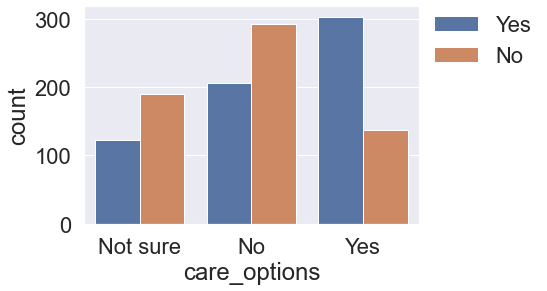

In [ ]:
# plot how care_options impacts the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='care_options', hue = 'treatment',  data= df_5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Observation
It will encourage employees to seek mental health treatment if their employer provide mental health care options.

### 2.2.14 wellness_program
#### (Has your employer ever discussed mental health as part of an employee wellness program?)

STEPs:
1. Identify unique repondents for wellness_program
2. Visualize the proportion

In [ ]:
# list the unique value of wellness_program
df_5.wellness_program.unique()

array(['No', "Don't know", 'Yes'], dtype=object)

In [ ]:
# check missing value for wellness_program
df_5[df_5.wellness_program.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


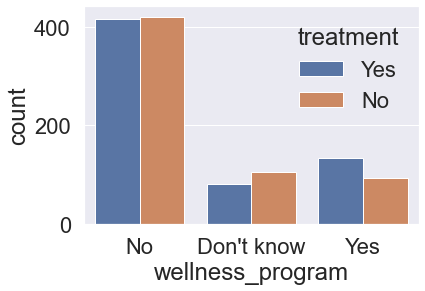

In [ ]:
# plot how wellness_program impacts the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='wellness_program', hue = 'treatment',  data= df_5)
plt.show()

#### Observation
It may slightly encourage employees to seek mental health treatment if their employer discussed mental health as part of an employee wellness program. However, the trend is not strong.

### 2.2.15 seek_help
#### (Does your employer provide resources to learn more about mental health issues and how to seek help?)

STEPs:
1. Identify unique repondents for seek_help
2. Visualize the proportion

In [ ]:
# list the unique value of seek_help
df_5.seek_help.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [ ]:
# check missing value for seek_help
df_5[df_5.seek_help.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


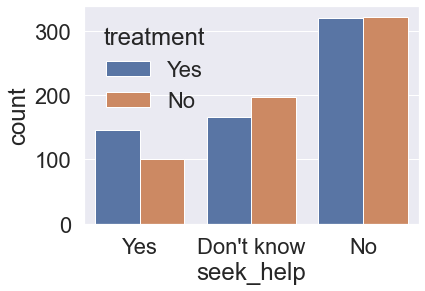

In [ ]:
# plot how seek_help impacts the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='seek_help', hue = 'treatment',  data= df_5)
plt.show()

#### Observation
It encourages employees to seek mental health treatment if their employer provide resources to learn more about mental health issues and how to seek help.

### 2.2.16 anonymity
#### (Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?)

STEPs:
1. Identify unique repondents for anonymity
2. Visualize the proportion

In [ ]:
# list the unique value of anonymity
df_5.anonymity.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [ ]:
# check missing value for anonymity
df_5[df_5.anonymity.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


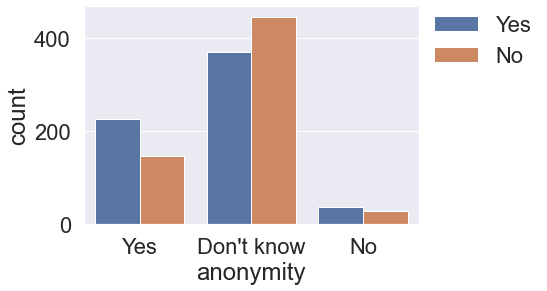

In [ ]:
# plot how anonymity of mental health condition impacts the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='anonymity', hue = 'treatment',  data= df_5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Observation
It encourages employees to seek mental health treatment if their anonymity is protected.

### 2.2.17 leave
#### (How easy is it for you to take medical leave for a mental health condition?)

STEPs:
1. Identify unique repondents for leave
2. Visualize the proportion

In [ ]:
# list the unique value of leave
df_5.leave.unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

In [ ]:
# check missing value for leave
df_5[df_5.leave.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


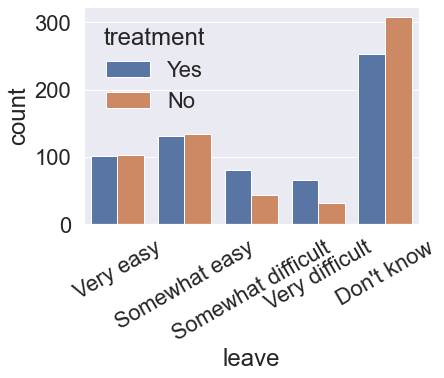

In [ ]:
# plot how the difficulty of asking for leaving impacts the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='leave', hue = 'treatment', order = ['Very easy','Somewhat easy', 'Somewhat difficult',
       'Very difficult', "Don't know" ], data= df_5)
plt.xticks(rotation = 30)
plt.show()

### 2.2.18 mental_health_consequence
#### (Do you think that discussing a mental health issue with your employer would have negative consequences?)

STEPs:
1. Identify unique repondents for mental_health_consequence
2. Visualize the proportion

In [ ]:
# list the unique value of mental_health_consequence
df_5.mental_health_consequence.unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [ ]:
# check missing value for mental_health_consequence
df_5[df_5.mental_health_consequence.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


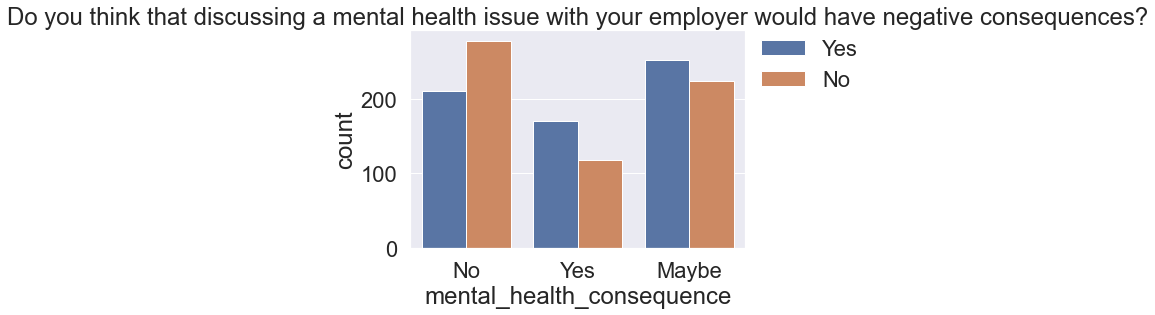

In [ ]:
# plot how the mental health consequence reduces the intention for mental health treatment
sns.set_style('darkgrid')
plt.title('Do you think that discussing a mental health issue with your employer would have negative consequences?')
sns.countplot(x='mental_health_consequence', hue = 'treatment',  data= df_5, order = ['No', "Yes" ,'Maybe'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### 2.2.19 phys_health_consequence
#### (Do you think that discussing a physical health issue with your employer would have negative consequences?)

STEPs:
1. Identify unique repondents for phys_health_consequence
2. Visualize the proportion

In [ ]:
# list the unique value of phys_health_consequence
df_5.phys_health_consequence.unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [ ]:
# check missing value for phys_health_consequence
df_5[df_5.phys_health_consequence.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


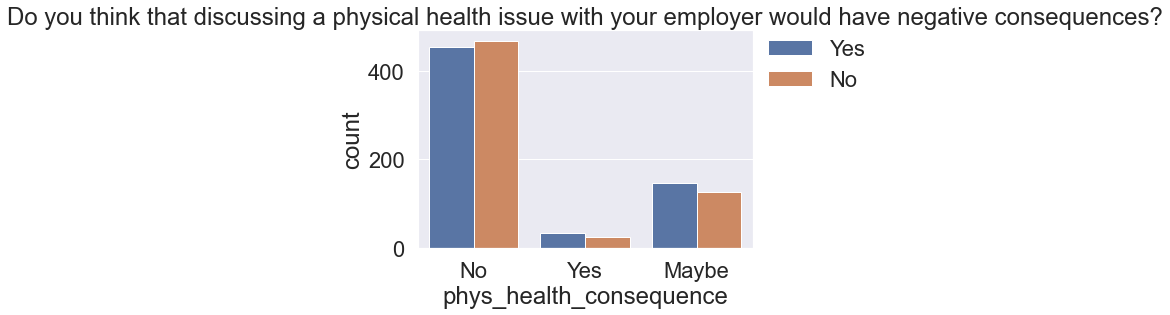

In [ ]:
# plot how the physical health consequence reduces the intention for mental health treatment
sns.set_style('darkgrid')
plt.title('Do you think that discussing a physical health issue with your employer would have negative consequences?')
sns.countplot(x='phys_health_consequence', hue = 'treatment',  data= df_5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Observation (leave, mental_health_consequence, phys_health_consequence)
1. Even thought some respondents think it is difficult to ask for leave, they will still seek for mental health treatment.
2. For respondents who feel it may have a negative effect to discuss mental health condition, they still have a higher ratio to seek for mental health treatment
3. Much less respondents think it will have a negative effect to discuss physical health condition


### 2.2.20 coworkers
#### (Would you be willing to discuss a mental health issue with your coworkers?)

STEPs:
1. Identify unique repondents for coworkers
2. Visualize the proportion

In [ ]:
# list the unique value of coworkers
df_5.coworkers.unique()

array(['Some of them', 'No', 'Yes'], dtype=object)

In [ ]:
# check missing value for coworkers
df_5[df_5.coworkers.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


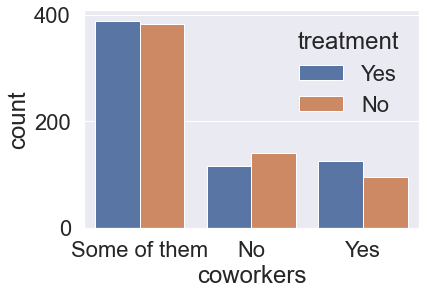

In [ ]:
# plot how the willingness to discuss mental health conditions with coworkers impacts the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='coworkers', hue = 'treatment',  data= df_5)
plt.show()

### 2.2.21 supervisor
#### (Would you be willing to discuss a mental health issue with your direct supervisor(s)?)

STEPs:
1. Identify unique repondents for supervisor
2. Visualize the proportion

In [ ]:
# list the unique value of supervisor
df_5.supervisor.unique()

array(['Yes', 'No', 'Some of them'], dtype=object)

In [ ]:
# check missing value for supervisor
df_5[df_5.supervisor.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


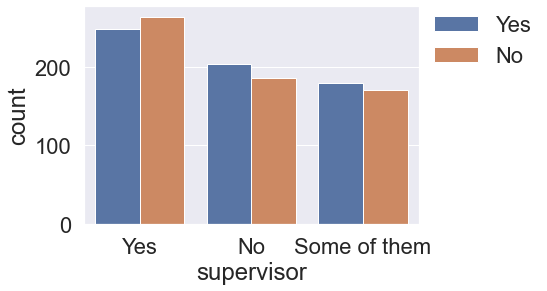

In [ ]:
# plot how the willingness to discuss mental health conditions with supervisors impacts
# the intention for mental health treatment
sns.set_style('darkgrid')
sns.countplot(x='supervisor', hue = 'treatment',  data= df_5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

#### Observation (coworkers & supervisors)
Based on the survey, it seems that if they are willing to talk about mental health condition with coworkers, there is a higher chance that they seek for mental health treatment. However, if they are willing to talk about mental health condition with supervisors, there is a lower chance that they will seek for mental health treatment.

### 2.2.22 mental_health_interview
#### (Would you bring up a mental health issue with a potential employer in an interview?)

STEPs:
1. Identify unique repondents for mental_health_interview
2. Visualize the proportion

In [ ]:
# list the unique value of mental_health_interview
df_5.mental_health_interview.unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [ ]:
# check missing value for mental_health_interview
df_5[df_5.mental_health_interview.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


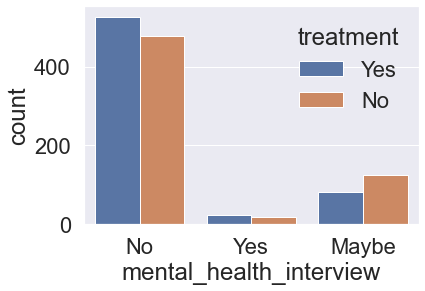

In [ ]:
# plot how it impacts the intention for mental health treatment whether employees bring up a mental health issue
# with a potential employer in an interview
sns.set_style('darkgrid')
sns.countplot(x='mental_health_interview', hue = 'treatment',  data= df_5)
plt.show()

### 2.2.23 phys_health_interview
#### (Would you bring up a physical health issue with a potential employer in an interview?)

STEPs:
1. Identify unique repondents for phys_health_interview
2. Visualize the proportion

In [ ]:
# list the unique value of phys_health_interview
df_5.phys_health_interview.unique()

array(['Maybe', 'No', 'Yes'], dtype=object)

In [ ]:
# check missing value for phys_health_interview
df_5[df_5.phys_health_interview.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


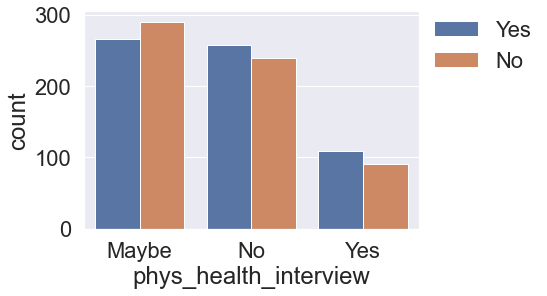

In [ ]:
# plot how it impacts the intention for physical health treatment whether employees bring up a mental health issue
# with a potential employer in an interview
sns.set_style('darkgrid')
sns.countplot(x='phys_health_interview', hue = 'treatment',  data= df_5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### 2.2.24 mental_vs_physical
#### (Do you feel that your employer takes mental health as seriously as physical health?)

STEPs:
1. Identify unique repondents for mental_vs_physical
2. Visualize the proportion

In [ ]:
# list the unique value of mental_vs_physical
df_5.mental_vs_physical.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [ ]:
# check missing value for mental_vs_physical
df_5[df_5.mental_vs_physical.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


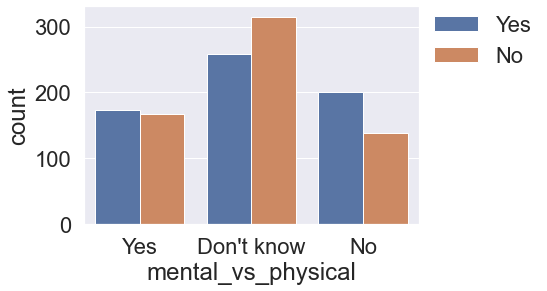

In [ ]:
# plot how it impacts the intention for physical health treatment whether employees feel
# that their employer takes mental health as seriously as physical health
sns.set_style('darkgrid')
sns.countplot(x='mental_vs_physical', hue = 'treatment',  data= df_5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### 2.2.25 obs_consequence
#### (Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?)

STEPs:
1. Identify unique repondents for obs_consequence
2. Visualize the proportion

In [ ]:
# list the unique value of obs_consequence
df_5.obs_consequence.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# check missing value for obs_consequence
df_5[df_5.obs_consequence.isna()]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range


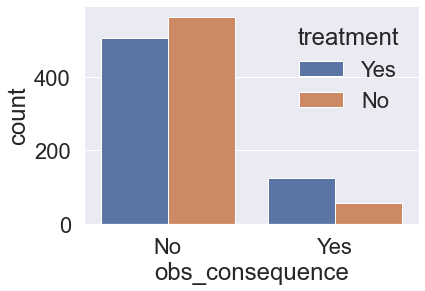

In [ ]:
# plot how it impacts the intention for physical health treatment whether employees
# heard of or observed negative consequences for coworkers with mental health conditions in your workplace
sns.set_style('darkgrid')
sns.countplot(x='obs_consequence', hue = 'treatment',  data= df_5)
plt.show()

#### Observation (mental_health_interview, phys_health_interview, mental_vs_physical, and obs_consequence)
1. Although compared to phys_health_interview, mental_health_interview doesn't change much on the ratio people seek for mental health treatment, less people are willing to talk about their mental health condition during the interview.
2. For the respondents who think their employer doesn't takes mental health as seriously as physical health, they have a higher ratio of seeking for mental health treatment.
3. Even if some respondents heard of or observed negative consequences for coworkers with mental health conditions in your workplace, they still have a higher tendency of seeking for mental health treatment.

### 2.2.26 comments
#### (Any additional notes or comments)

STEPs:
1. Identify unique repondents for comments

In [ ]:
df_5.comments.unique()

array([nan,
       "I'm not on my company's health insurance which could be part of the reason I answered Don't know to so many questions.",
       'I have chronic low-level neurological issues that have mental health side effects. One of my supervisors has also experienced similar neurological problems so I feel more comfortable being open about my issues than I would with someone without that experience. ',
       "My company does provide healthcare but not to me as I'm on a fixed-term contract. The mental healthcare I use is provided entirely outside of my work.",
       'Relatively new job. Ask again later',
       'Sometimes I think  about using drugs for my mental health issues. If i use drugs I feel better',
       'I selected my current employer based on its policies about self care and the quality of their overall health and wellness benefits. I still have residual caution from previous employers who ranged from ambivalent to indifferent to actively hostile regarding mental he

**Because we don't conduct Natural Language Process here, this feature will be dropped**

In [ ]:
df_6 = df_5.drop(['comments'], axis= 1)

In [ ]:
df_6.shape

(1252, 25)

**Because most of the respondents are from US, UK, etc. and there are too many countries listed, this may not be a good feature. Therefore, Country_n is dropped.**

In [ ]:
# drop the country_n column
df_7 = df_6.drop(['Country'], axis= 1)
df_origin = df_6.drop(['Country'], axis= 1)

### 2.3 Feature Engineering
#### 2.3.1 Translate Categories to Numerical Variables - Encoding data

In [ ]:
# helper function: translate category column to numerical column
def catcode(df, col):
    df[col + "_n"] = df[col].astype("category").cat.codes
    df = df.drop(col, axis=1, inplace=True)

In [ ]:
# create numerical columns from categories
_ = [catcode(df_7, col) for col in list(df_7.dtypes[df_7.dtypes == np.object].index)]
print(df_7.select_dtypes(exclude="object").nunique())

Age                            46
age_range                       5
Gender_n                        3
self_employed_n                 3
family_history_n                2
treatment_n                     2
work_interfere_n                5
no_employees_n                  6
remote_work_n                   2
tech_company_n                  2
benefits_n                      3
care_options_n                  3
wellness_program_n              3
seek_help_n                     3
anonymity_n                     3
leave_n                         5
mental_health_consequence_n     3
phys_health_consequence_n       3
coworkers_n                     3
supervisor_n                    3
mental_health_interview_n       3
phys_health_interview_n         3
mental_vs_physical_n            3
obs_consequence_n               2
dtype: int64


In [ ]:
# print the unique value of age range
df_7['age_range'].unique()

['36-45', '26-35', '0-25', '46-65', '66-100']
Categories (5, object): ['0-25' < '26-35' < '36-45' < '46-65' < '66-100']

In [ ]:
# set up additional feature age_range_n in category
df_7['age_range_n'] = 0
df_7.loc[df_7['age_range'] == '0-25','age_range_n']  = 0
df_7.loc[df_7['age_range'] == '26-35','age_range_n']  = 1
df_7.loc[df_7['age_range'] == '36-45','age_range_n']  = 2
df_7.loc[df_7['age_range'] == '46-65','age_range_n']  = 3
df_7.loc[df_7['age_range'] == '66-100','age_range_n']  = 4

### 2.3.2 Scaling

In [ ]:
# check the shape of data frame
df_7.shape

(1252, 25)

In [ ]:
# copy over the df_7 and drop age range
df_8 = df_7.copy().drop(['age_range'], axis= 1)

In [ ]:
# check the first few columns of df_8
df_8.head()

,Age,Gender_n,self_employed_n,family_history_n,treatment_n,work_interfere_n,no_employees_n,remote_work_n,tech_company_n,benefits_n,...,leave_n,mental_health_consequence_n,phys_health_consequence_n,coworkers_n,supervisor_n,mental_health_interview_n,phys_health_interview_n,mental_vs_physical_n,obs_consequence_n,age_range_n
0,37,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,44,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,32,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,1
3,31,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,1
4,31,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,1


In [ ]:
# Scaling the features
scaler = MinMaxScaler()
for i in df_8.columns:
    df_8[i] = scaler.fit_transform(np.array(df_8.loc[:,i]).reshape(-1,1))

In [ ]:
# check the info of data frame after scaling
df_8.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1252.000,0.345,0.120,0.000,0.262,0.328,0.410,1.000
Gender_n,1252.000,0.409,0.211,0.000,0.500,0.500,0.500,1.000
self_employed_n,1252.000,0.550,0.172,0.000,0.500,0.500,0.500,1.000
family_history_n,1252.000,0.391,0.488,0.000,0.000,0.000,1.000,1.000
treatment_n,1252.000,0.505,0.500,0.000,0.000,1.000,1.000,1.000
work_interfere_n,1252.000,0.573,0.399,0.000,0.250,0.750,1.000,1.000
no_employees_n,1252.000,0.558,0.347,0.000,0.200,0.600,0.800,1.000
remote_work_n,1252.000,0.297,0.457,0.000,0.000,0.000,1.000,1.000
tech_company_n,1252.000,0.819,0.385,0.000,1.000,1.000,1.000,1.000
benefits_n,1252.000,0.526,0.419,0.000,0.000,0.500,1.000,1.000


In [ ]:
# check the first few columns of the df_8
df_8.head().T

,0,1,2,3,4
Age,0.426,0.541,0.344,0.328,0.328
Gender_n,0.000,0.500,0.500,0.500,0.500
self_employed_n,0.000,0.000,0.000,0.000,0.000
family_history_n,0.000,0.000,0.000,1.000,0.000
treatment_n,1.000,0.000,0.000,1.000,0.000
work_interfere_n,0.500,0.750,0.750,0.500,0.250
no_employees_n,0.800,1.000,0.800,0.400,0.200
remote_work_n,0.000,0.000,0.000,0.000,1.000
tech_company_n,1.000,0.000,1.000,1.000,1.000
benefits_n,1.000,0.000,0.500,0.500,1.000


In [ ]:
# check data frame info
df_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1252 non-null   float64
 1   Gender_n                     1252 non-null   float64
 2   self_employed_n              1252 non-null   float64
 3   family_history_n             1252 non-null   float64
 4   treatment_n                  1252 non-null   float64
 5   work_interfere_n             1252 non-null   float64
 6   no_employees_n               1252 non-null   float64
 7   remote_work_n                1252 non-null   float64
 8   tech_company_n               1252 non-null   float64
 9   benefits_n                   1252 non-null   float64
 10  care_options_n               1252 non-null   float64
 11  wellness_program_n           1252 non-null   float64
 12  seek_help_n                  1252 non-null   float64
 13  anonymity_n       

### 2.4 Exploratory Data Analysis after encoding

### 2.4.1 Covariance Matrix. Variability comparison between categories of variables

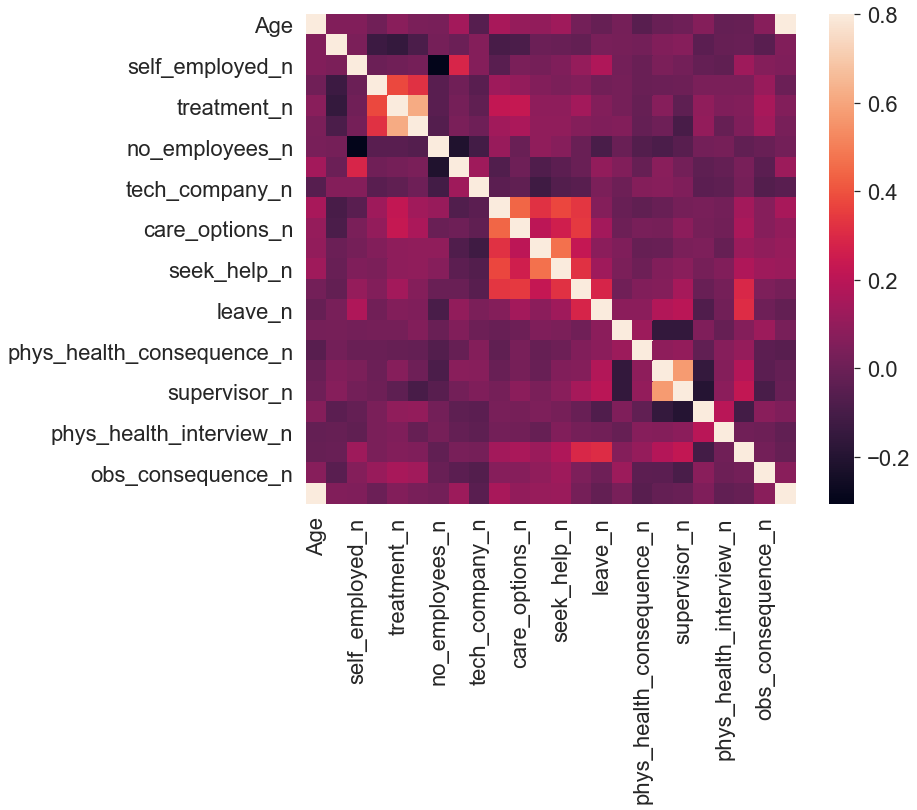

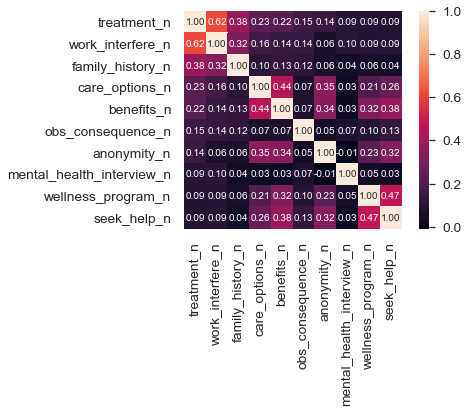

In [ ]:
#correlation matrix
corrmat = df_8.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment_n')['treatment_n'].index
cm = np.corrcoef(df_8[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
# plt.savefig('cov.png')
plt.show()

## **How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?**

## Mental Health Treatment Rates by Country (Top 10 countries)

| Country         | Respondents | % Reporting Treatment |
|-----------------|-------------|-----------------------|
| United States   | 751         | 48.3%                 |
| United Kingdom  | 185         | 48.1%                 |
| Canada          | 72          | 41.7%                 |
| Germany         | 47          | 40.4%                 |
| Netherlands     | 27          | 48.1%                 |
| Australia       | 22          | 54.5%                 |
| Ireland         | 15          | 46.7%                 |
| Sweden          | 13          | 30.8%                 |
| India           | 12          | 25.0%                 |
| New Zealand     | 10          | 40.0%                 |

**Highlights:**

✅ ~48% of US and UK respondents report having received treatment for mental health issues.  

✅ Australia appears slightly higher (54.5%) among top countries.  

✅ Lower rates in India (25%), but note small sample size.  

## **What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?**

### ➤ Family History

**Does family history predict higher treatment rates?**

| Family History | % Reporting Treatment |
|----------------|-----------------------|
| Yes            | 70.8%                 |
| No             | 34.5%                 |

✅ People with a family history of mental illness are ~2× more likely to have sought treatment.

---

### ➤ Work Interference

“How often does your mental health interfere with your work?”

| Work Interferes? | % Reporting Treatment |
|------------------|-----------------------|
| Never            | 19.1%                 |
| Rarely           | 27.3%                 |
| Sometimes        | 57.3%                 |
| Often            | 83.3%                 |

✅ Those whose mental health **often interferes with work** are far more likely to report having sought treatment.

---

### ➤ Gender

| Gender         | % Reporting Treatment |
|----------------|-----------------------|
| Male           | 41.2%                 |
| Female         | 53.6%                 |
| Other/Non-binary| 58.7%                |

✅ Women and non-binary respondents report higher treatment rates than men.

---

### ➤ Benefits

“Does your employer provide mental health benefits?”

| Mental Health Benefits | % Reporting Treatment |
|------------------------|-----------------------|
| Yes                    | 52.1%                 |
| No                     | 39.0%                 |
| Don't know             | 40.3%                 |

✅ Those aware of mental health benefits are **more likely to have sought treatment.**


# 4. Conclusion

## 4.1 Summary

#### For people who have already sought mental health treatment, they are more aware of the options and benefits. However, they don't think mental health is taken as seriously as the physical health
**Solution: Better health care plans and human support**

#### For people who haven’t sought mental health treatment, they may feel the inclusion of mental health issues is not good enough
**Solution: Workplan mental health education**

## 4.2 Future work

4.2.1 Additional features (feeling, psychological behavior, mental health conditions)

4.2.2 other datasets (Demographic dataset of people in Tech)


## 4.3 Scale up

**If the dataset to be 100X what we have. How would we change our approach? How would we prepare a data pipeline?**

### Advantage:
1. North America to globally
2. More clustering groups to build

### Challenge:
1. Computation Power
2. Feature processing

### Solution:
1. Sampling
2. Parallel processing and modelling
3. CPU to GPU
4. Cloud based deployment